On my test post, we'll solve  Kaggle's [Digit Recognizer](https://www.kaggle.com/c/digit-recognizer) competition using python's machine learning library `sklearn`. It a really simple problem and used as a starting point (along with the [Titanic](https://www.kaggle.com/c/titanic) one) Kaggle competitions. If you want to check out an implementation from scratch, I have uploaded one on this repo on github. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
%matplotlib inline

# Exploring the data 

In [4]:
import numpy as np

X =  np.genfromtxt('train.csv',
                   dtype='int_', 
                   delimiter=',', 
                   skip_header=1)
x_test =  np.genfromtxt('test.csv',
                        dtype='int_', 
                        delimiter=',', 
                        skip_header=1)
x_train = X[:,1:]
y_train = X[:,0]

Each row in the `x_train` and `x_test` data is a 28x28 pixels image with a total of 784 pixels. Therefore, we will write a simple function takes randomly selected rows, reshapes them into 28x28 matrices and display them using `matplotlib.image.mpimg`. 

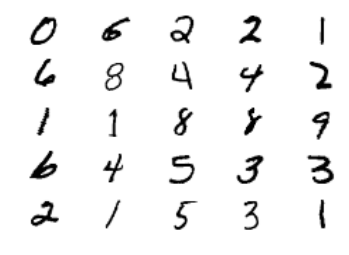

In [5]:
def display(n):    
    for i in range(1,(n**2)+1):
        plt.subplot(n,n,i)
        plt.axis('off')
        pic = np.reshape(x_train[np.random.randint(1,42000)],(28,28))
        imgplot = plt.imshow(pic, cmap='Greys')
display(5)

# Training the models

### Logistic regression

In [6]:
from sklearn.linear_model import LogisticRegressionCV
model_log = LogisticRegressionCV(multi_class='multinomial') 
model_log.fit(x_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='multinomial', n_jobs=1, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

### Random forests

In [9]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(1000)
model_rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Neural networks

In [11]:
import tensorflow.contrib.learn as skflow
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')
x_test = x_test.astype('float32')
model_nn = skflow.TensorFlowDNNClassifier(hidden_units=[100,50], n_classes=10, steps=100000)
model_nn.fit(x_train, y_train)

Step #99, avg. train loss: 11.68955
Step #199, avg. train loss: 1.90498
Step #299, avg. train loss: 1.59837
Step #399, avg. train loss: 1.39525
Step #499, avg. train loss: 1.30917
Step #599, avg. train loss: 1.24795
Step #699, avg. train loss: 1.17851
Step #799, avg. train loss: 1.14037
Step #899, avg. train loss: 0.98428
Step #999, avg. train loss: 0.90913
Step #1099, avg. train loss: 0.87294
Step #1199, avg. train loss: 0.80876
Step #1299, avg. train loss: 0.76986
Step #1400, epoch #1, avg. train loss: 0.66272
Step #1500, epoch #1, avg. train loss: 0.68679
Step #1600, epoch #1, avg. train loss: 0.71283
Step #1700, epoch #1, avg. train loss: 0.63373
Step #1800, epoch #1, avg. train loss: 0.62656
Step #1900, epoch #1, avg. train loss: 0.63143
Step #2000, epoch #1, avg. train loss: 0.59257
Step #2100, epoch #1, avg. train loss: 0.50856
Step #2200, epoch #1, avg. train loss: 0.54319
Step #2300, epoch #1, avg. train loss: 0.53000
Step #2400, epoch #1, avg. train loss: 0.53368
Step #2500, 

TensorFlowDNNClassifier(batch_size=32, class_weight=None, clip_gradients=5.0,
            config=None, continue_training=False, dropout=None,
            hidden_units=[100, 50], learning_rate=0.1, n_classes=10,
            optimizer='Adagrad', steps=100000, verbose=1)

Now let's check the accuracy of the training data. 

In [14]:
model_log.score(x_train, y_train)

0.94135714285714289

In [15]:
model_rf.score(x_train, y_train)

1.0

In [12]:
model_nn.score(x_train, y_train)

0.99328571428571433

# Submitting the data

In [17]:
def submit(model,x_test, name):
    # predict y using the test set
    y_test = model.predict(x_test) 
    # kaggles requires the submission to include an index column         
    index = np.arange(1,len(x_test)+1, dtype=int)  
    # merging the y_test and index columns        
    y_test = np.column_stack((index,y_test))
    # convert to pandas dataframe
    y_test = pd.DataFrame(y_test)
    # headers required for the submission                          
    y_test.columns = ['ImageId','Label']    
    # write the data to csv file in the directory    
    y_test = y_test.astype('int')
    y_test.to_csv("".join([name,'.csv']), index=False) 

In [18]:
submit(model_log,x_test,'model_log')
submit(model_rf,x_test,'model_rf')
submit(model_nn,x_test,'model_nn')

# Results

| Model               | Test Accuracy Score |
|---------------------|---------------------|
| Logistic Regression | 0.91771             |
| Random Forests      | 0.96800             |
| Neural Networks     | 0.94900             |